In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind
from scipy import sparse, stats

grid_search_dir = '.'
datadir = '.'

In [2]:
clm = ncem.interpretation.InterpreterDeconvolution()
clm.load_model(
    results_path=grid_search_dir,
    gs_id="220128c_DECONVOLUTION_PATIENT_cell2location_lymphnode_hvg",
    cv_idx=1,
    model_id='220128c_deconvolution_patient_cell2location_lymphnode_hvg_adam_lr1_bsS_md0_ri1_n10_fsstandard_l21_l11',
)
clm.get_data_again(data_path=datadir + "cell2location_hvg/", data_origin="cell2location_lymphnode")
clm.init_model_again()
#clm.reinitialize_model(changed_model_kwargs={'input_shapes': (1, 1888, 12)})

clm.split_data_byidx_again(cv_idx=1)

clm.load_weights_again()

220128c_DECONVOLUTION_PATIENT_cell2location_lymphnode_hvg: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 220128c_deconvolution_patient_cell2location_lymphnode_hvg_adam_lr1_bsS_md0_ri1_n10_fsstandard_l21_l11
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 64560 × 2000
    obs: 'index', 'target_cell'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'node_type_names', 'metadata', 'img_to_patient_dict'
    obsm: 'node_types', 'proportions', 'spatial'
collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


Loaded 1 images with complete data from 1 patients over 64560 cells with 2000 cell features and 16 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 15.000000


2022-02-15 12:08:42.969976: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-15 12:08:43.504783: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14633 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


cross-validation selected: cv1


In [3]:
clm.get_sender_receiver_effects()

using ols parameters.
calculating inv fim.


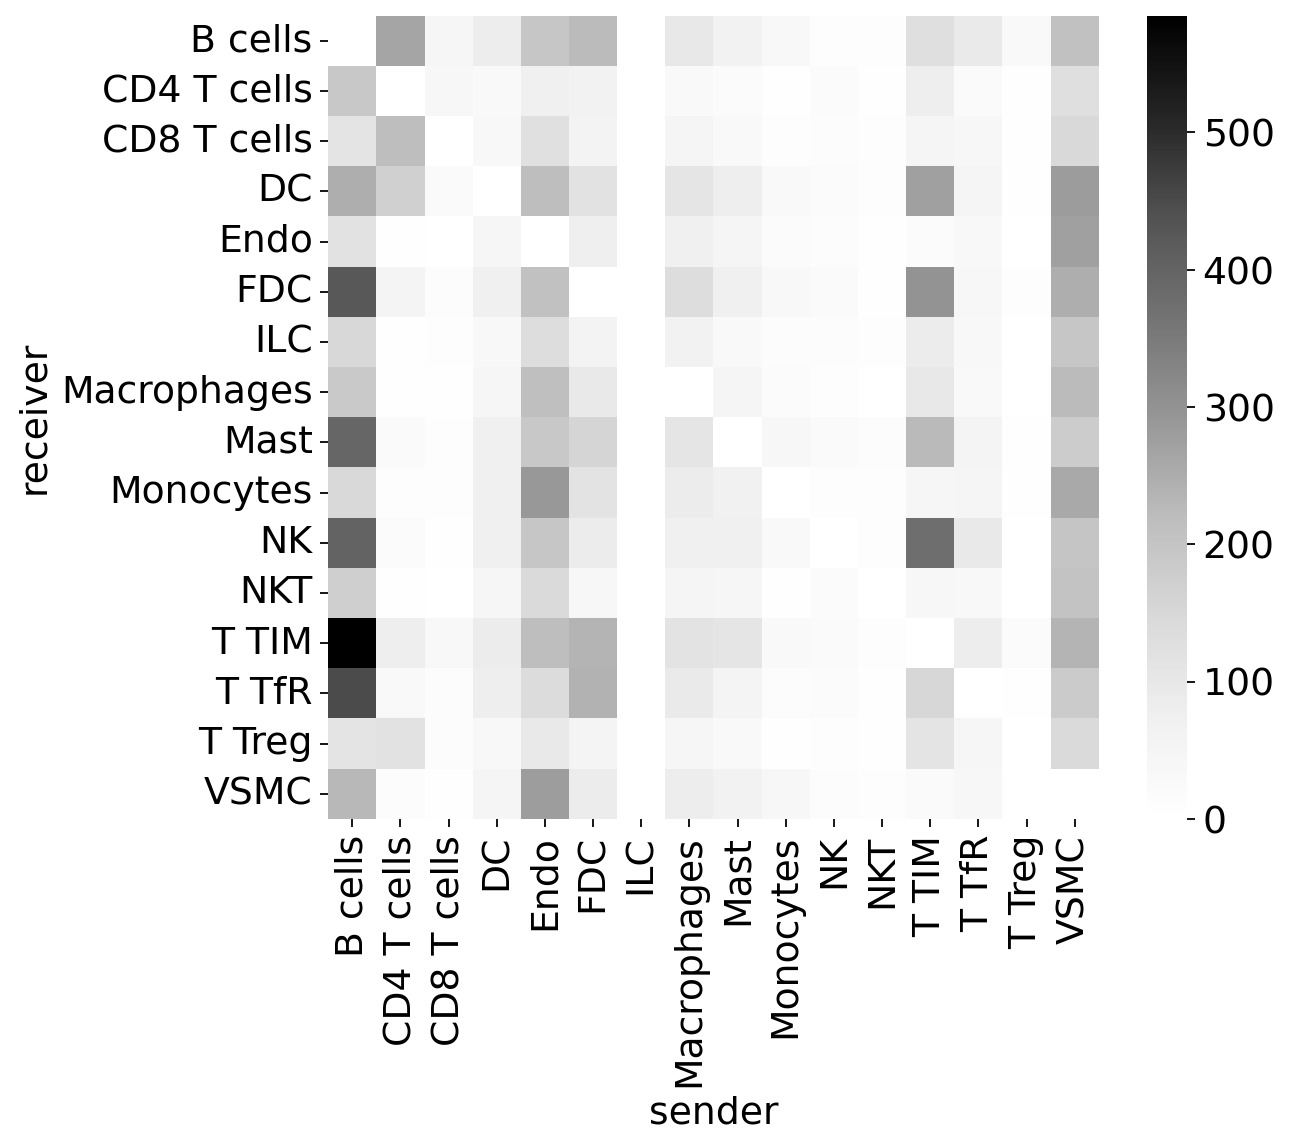

In [4]:
clm.type_coupling_analysis(fontsize=17, figsize=(8.5, 7.5))

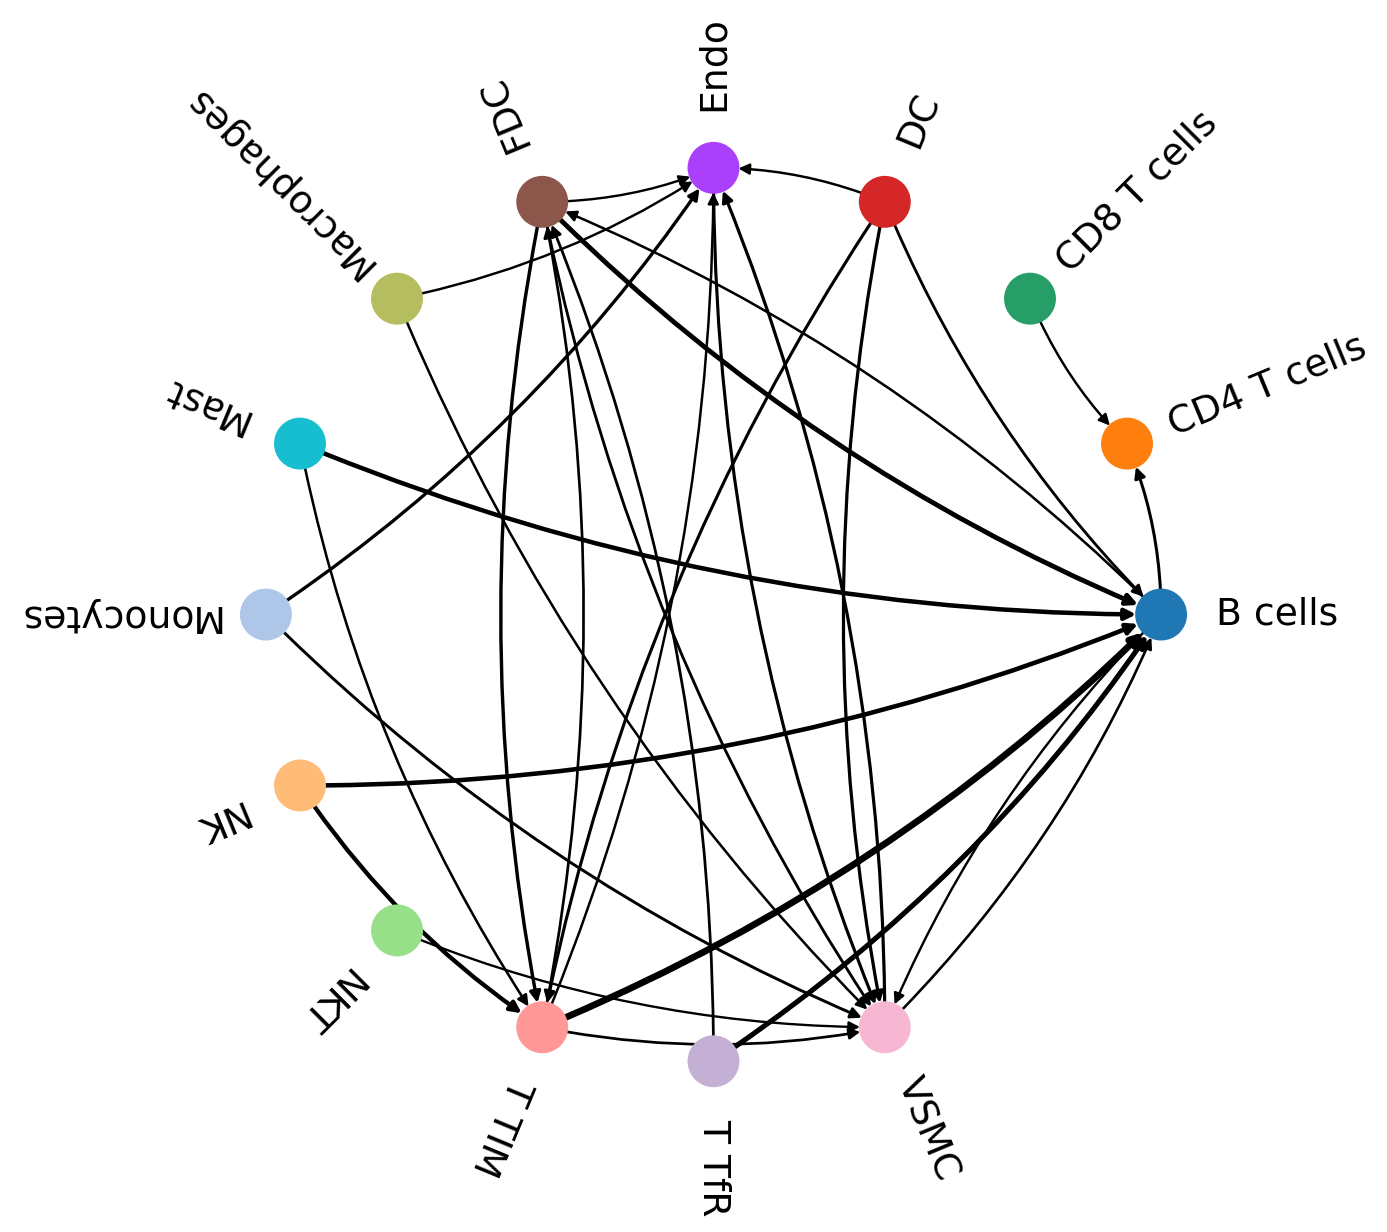

In [5]:
clm.type_coupling_analysis_circular(edge_attr='de_genes', edge_width_scale=3.)

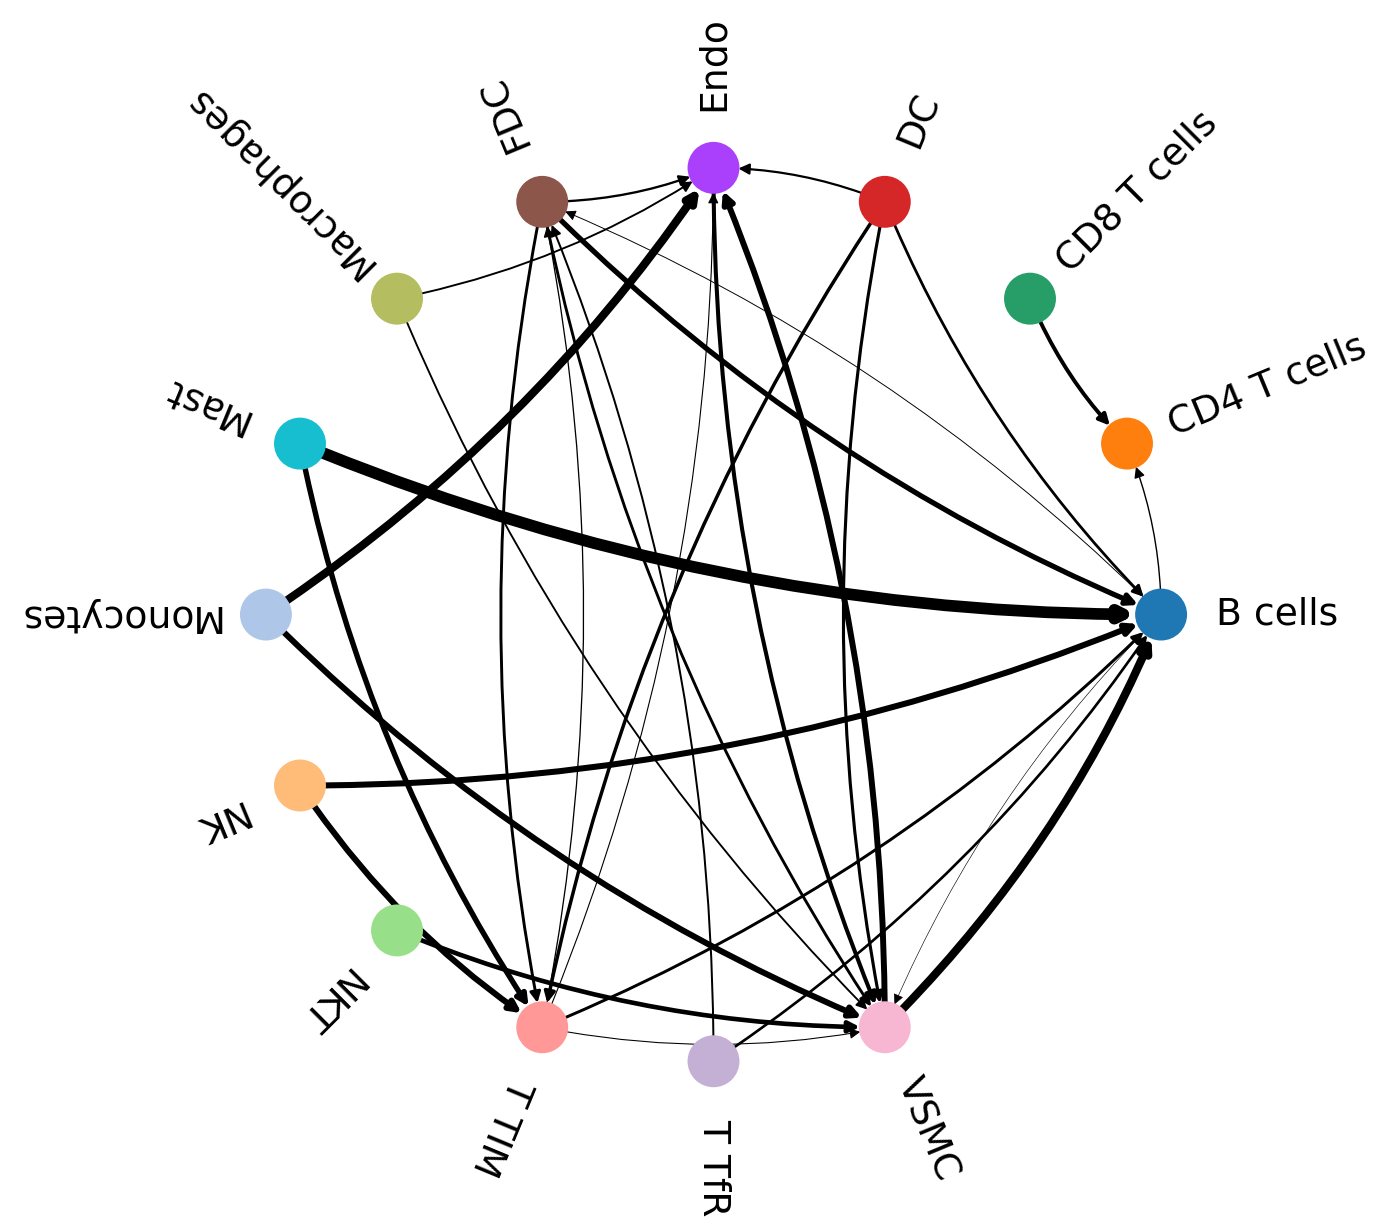

In [6]:
clm.type_coupling_analysis_circular(edge_attr='magnitude', edge_width_scale=2.)

In [5]:
clm.sender_receiver_values(receiver='B cells', sender='FDC')

,mean expression,pvalue,qvalue,fold change
FGR,0.136403,6.940421e-01,1.000000,0.000553
CFH,0.000181,5.376028e-01,1.000000,0.000968
SEMA3F,0.000173,9.336111e-01,1.000000,-0.000043
LAP3,0.265156,8.897399e-03,0.118140,-0.005267
CD99,0.285704,4.381122e-01,1.000000,0.001392
...,...,...,...,...
CCL14,0.000217,8.107842e-01,1.000000,0.000508
PCGF2,0.000338,6.361760e-01,1.000000,0.000275
MARCKS,0.367271,2.306969e-07,0.000006,0.014988
CCL3,0.007141,8.957381e-01,1.000000,0.000114


In [12]:
gene_subset = clm.sender_receiver_gene_subset(receiver='B cells', sender='FDC')
print(gene_subset)

['LTF', 'FTL', 'PFN1', 'CR2', 'RPS25', 'RPL13A', 'CXCL14', 'IGFBP3', 'CXCL13', 'EEF1A1', 'IGFBP7', 'RPSA', 'CD52', 'RPS27', 'FDCSP', 'IGLC3', 'IGHA1', 'IGHG1', 'IGHG3']


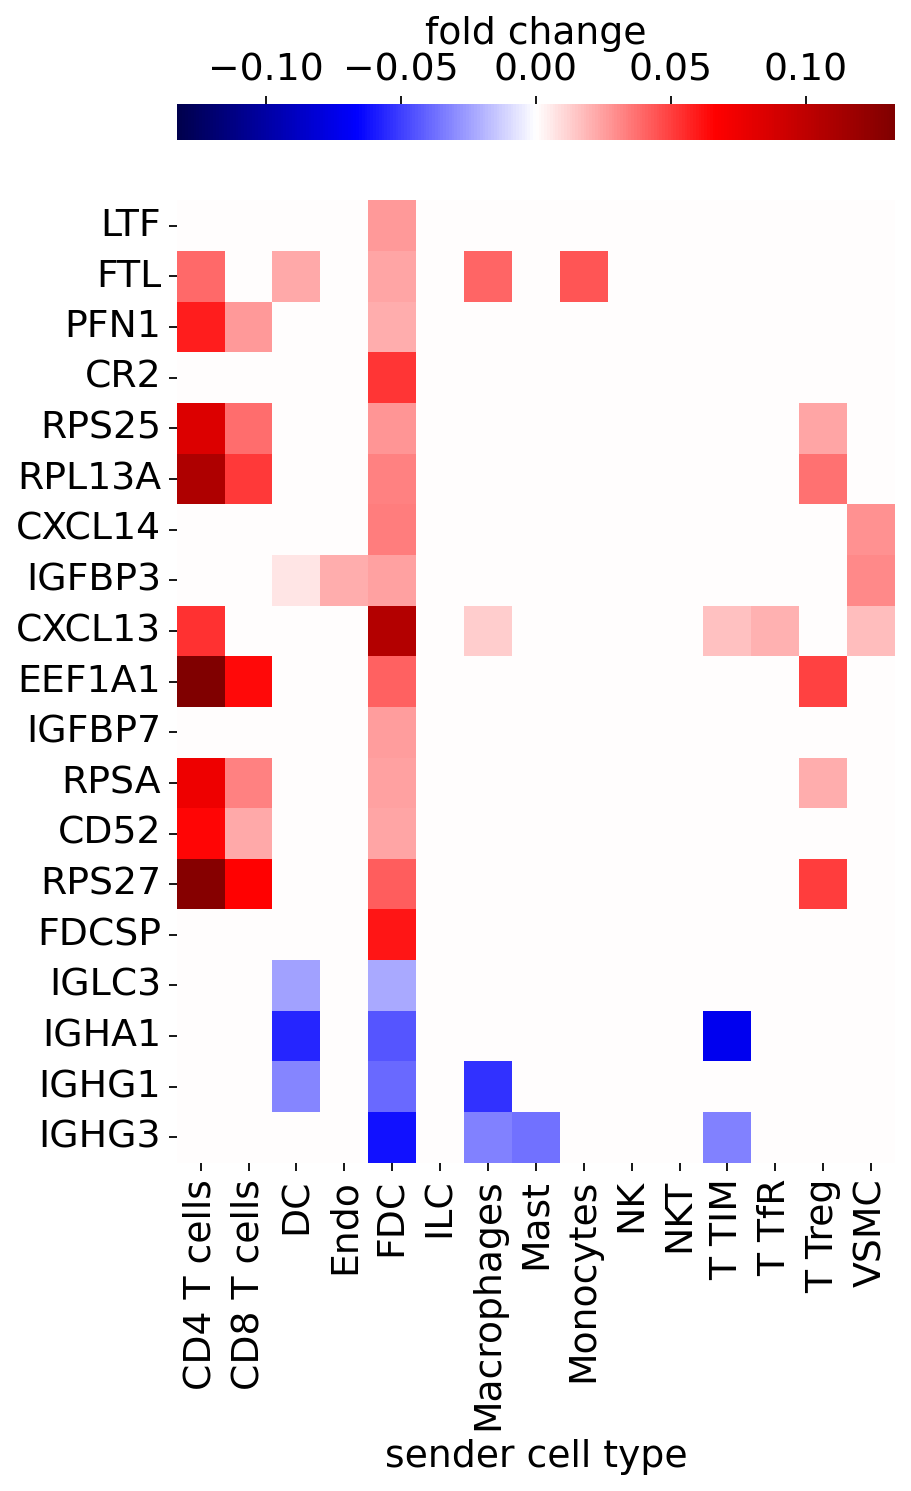

In [13]:
clm.sender_effect(receiver='B cells', gene_subset=gene_subset)

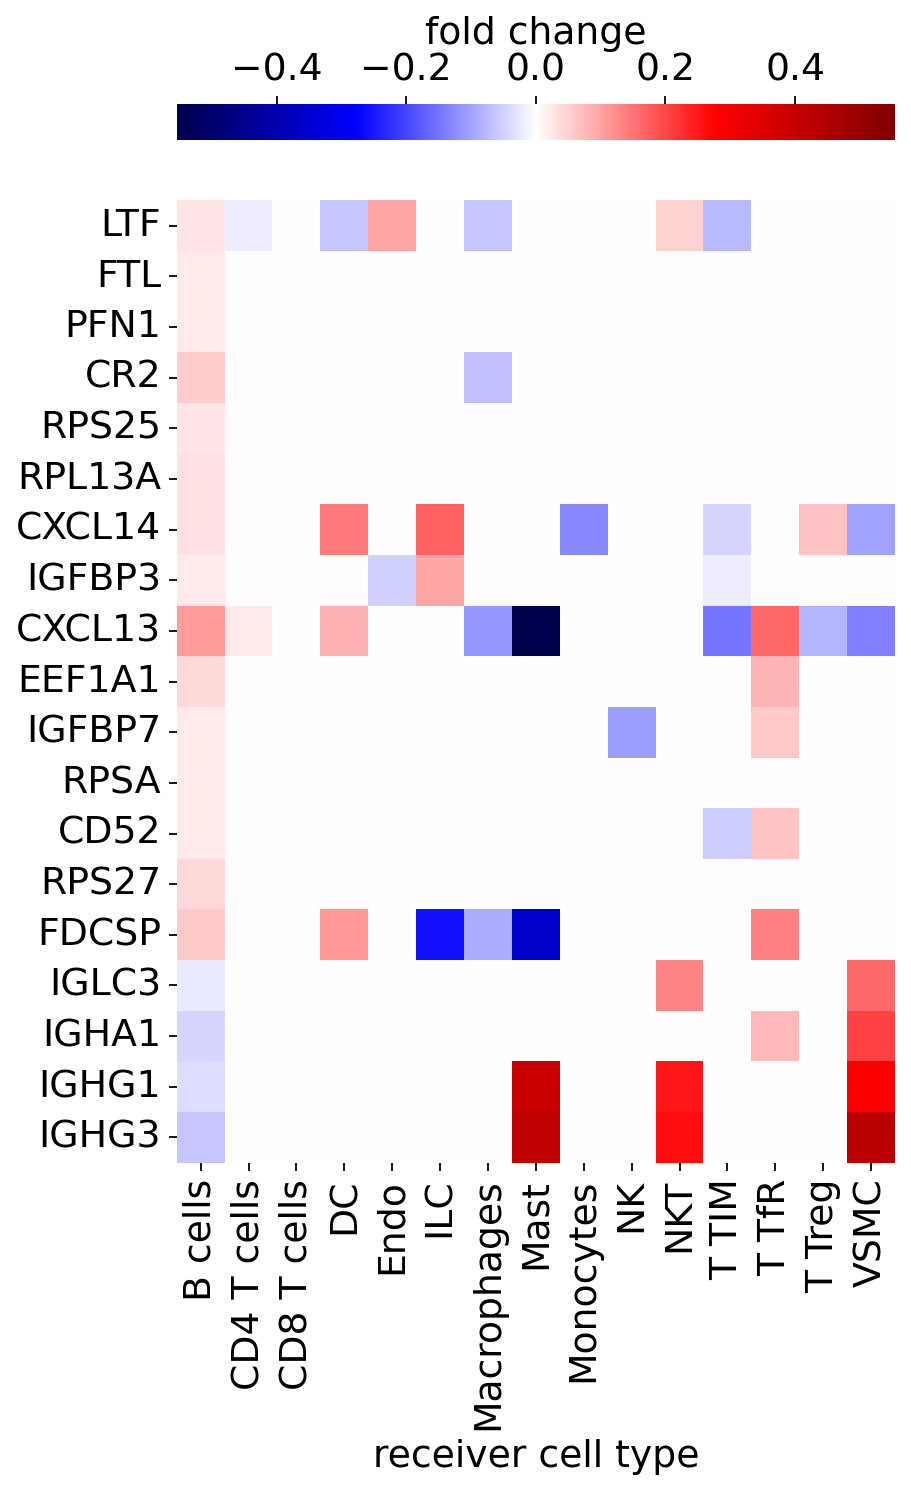

In [14]:
clm.receiver_effect(sender='FDC', gene_subset=gene_subset)

0.1060240409334365


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/ncem/interpretation/interpreter.py:1007: RuntimeWarning: divide by zero encountered in log10
  y=-np.log10(self.qvalues[receiver_idx,sender_idx,:])[qval_filter],
/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/ncem/interpretation/interpreter.py:1013: RuntimeWarning: divide by zero encountered in log10
  y = -np.nan_to_num(np.log10(self.qvalues[receiver_idx,sender_idx,:])[qval_filter])
/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/matplotlib/axes/_base.py:2919: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])
/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/ncem/interpretation/interpreter.py:1021: RuntimeWarning: divide by zero encountered in log10
  y = -np.nan_to_num(np.log10(self.qvalues[receiver_idx,sender_idx,:])[qval_filter], neginf=-14.5)
/home/icb/anna.schaar/miniconda3/en

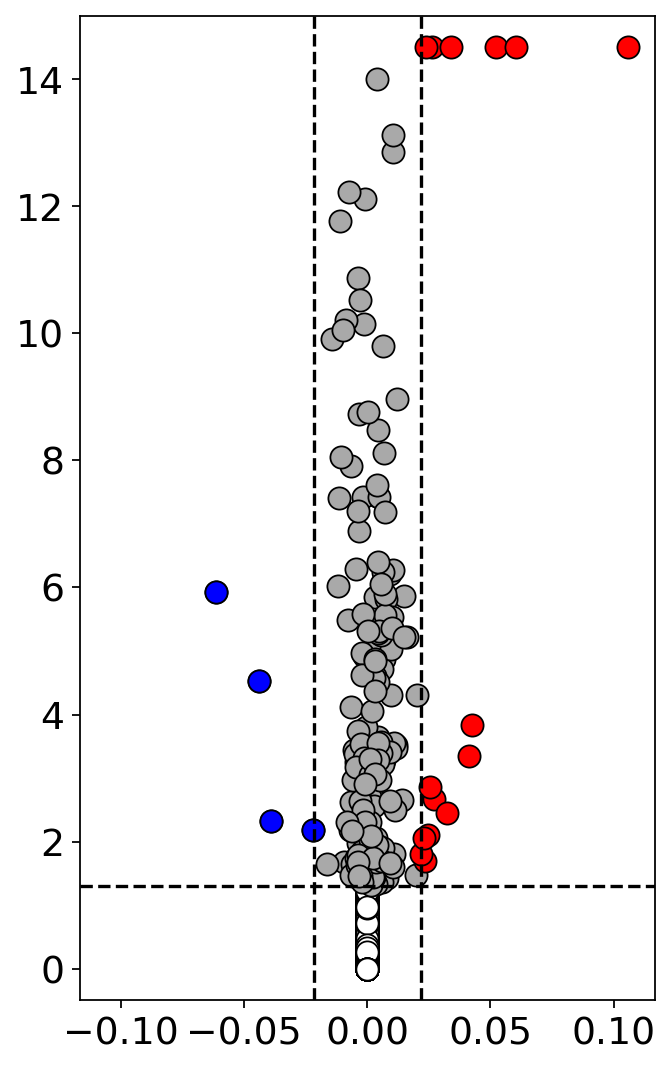

In [16]:
clm.sender_receiver_effect_vulcanoplot(receiver='B cells', sender='FDC')

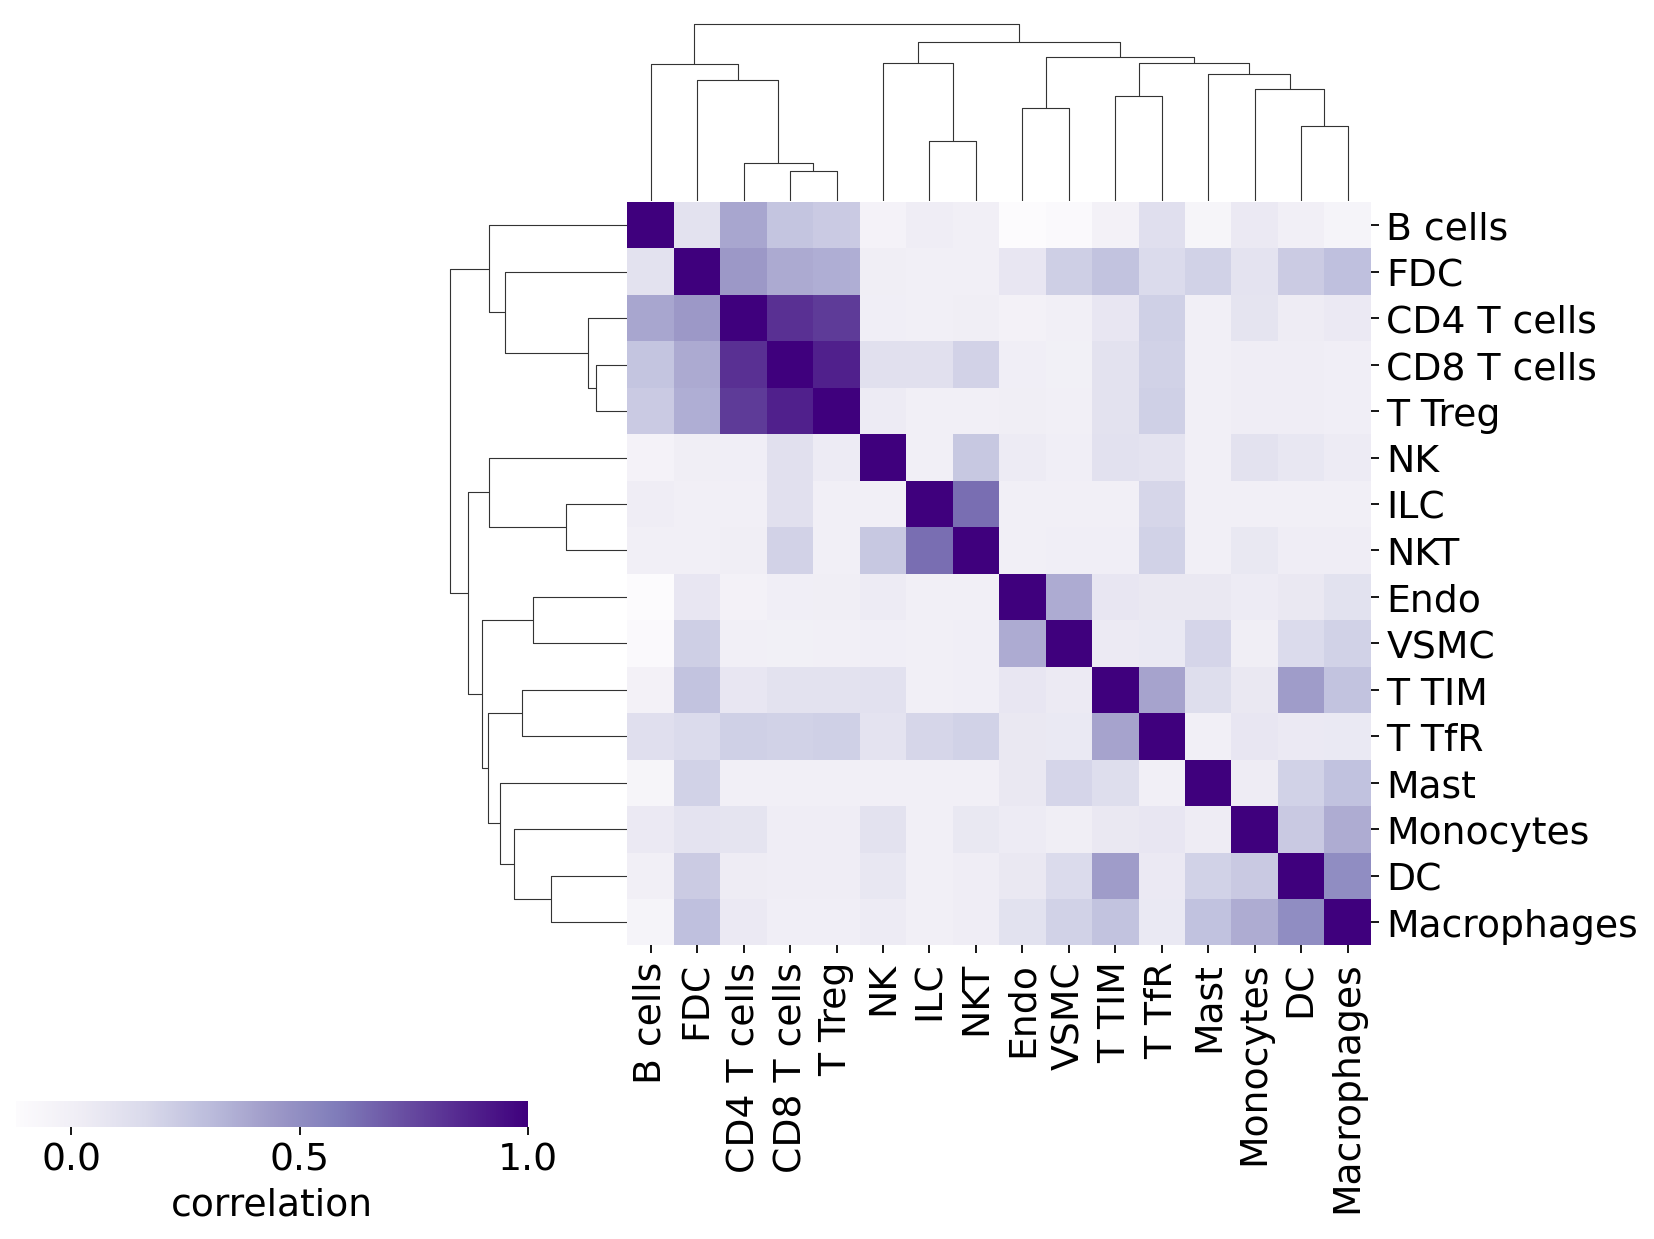

In [15]:
clm.sender_similarity_analysis(receiver='B cells')